In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Fonte: https://ourworldindata.org/coronavirus-source-data

In [3]:
df = pd.read_csv('./dados_panda/owid-covid-data.csv')

In [4]:
df_br = df[df['location'] == 'Brazil'].reset_index().drop('index',axis=1)

In [5]:
df_br  = df_br[['date','total_cases','total_deaths']]

In [6]:
df_br.tail()

,date,total_cases,total_deaths
127,2020-05-06,114715,7921
128,2020-05-07,125218,8536
129,2020-05-08,135106,9146
130,2020-05-09,145328,9897
131,2020-05-10,155939,10627


### obs: Estilo Seaborn você pode usar no matplotlib
plt.style.use('seaborn')

In [7]:
# Plote-date
plt.style.use('seaborn')

Text(0.5, 0, '')

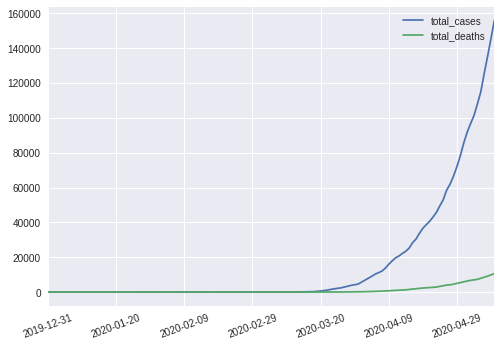

In [8]:
df_br.plot(x = 'date', y = ['total_cases','total_deaths'])
#plt.xticks(np.arange(0,df_br.shape[0],step = 30),rotation=20)
plt.xticks(rotation=20)

plt.xlabel('')

### Converter para Datetime

In [9]:
df_br.info()
#Não reconheceu a coluna date como arquivo de Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
date            132 non-null object
total_cases     132 non-null int64
total_deaths    132 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [10]:
df_br['date'] = pd.to_datetime(df_br['date'],format = '%Y/%m/%d')#formato que está

In [11]:
df_br.info()
#Agora está como datetime64 (ok)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
date            132 non-null datetime64[ns]
total_cases     132 non-null int64
total_deaths    132 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.2 KB


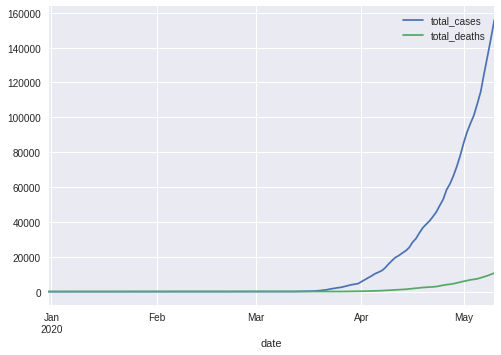

In [12]:
#plt.figure(figsize=(10,8))
#plt.plot(df_br['date'],df_br['total_cases'])
df_br.plot(x= 'date')

#Veja a Diferença no plot

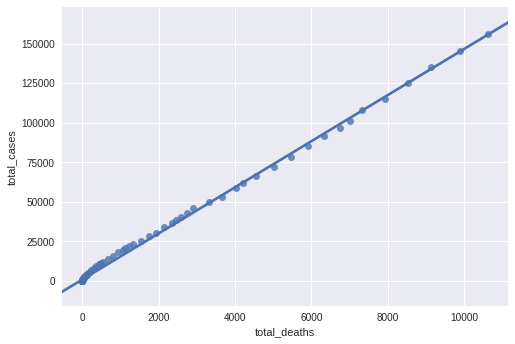

In [13]:
sns.regplot(x='total_deaths', y="total_cases", data=df_br)

In [14]:
df_br.shape[0]

132

#### testando regplot

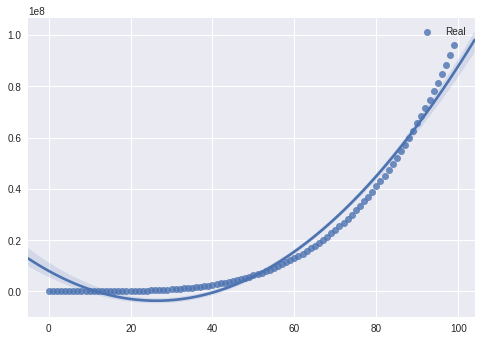

In [15]:
x = np.arange(0,100)
y = x**4

sns.regplot(x=x,y=y, n_boot=1000,order=2,label='Real')
plt.legend()

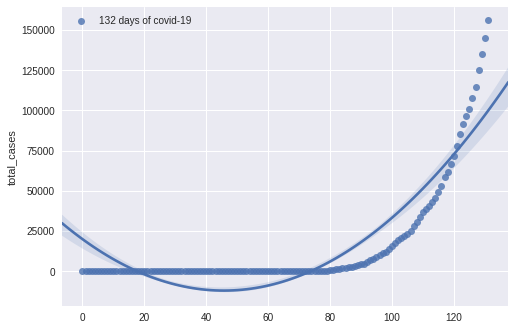

In [16]:
sns.regplot(x=np.arange(0,df_br.shape[0]),y=df_br['total_cases'], n_boot=10,order=2,label='132 days of covid-19')
plt.legend()

In [17]:
#Agora como ele reconhece como date a nossa 
#coluna date, podemos executar algumas funções

In [18]:
#Mês
df_br['date'].dt.month.head(3)

0    12
1     1
2     1
Name: date, dtype: int64

In [19]:
#dia
df_br['date'].dt.day.head(3)

0    31
1     1
2     2
Name: date, dtype: int64

In [20]:
#Ano
df_br['date'].dt.year.head(3)

0    2019
1    2020
2    2020
Name: date, dtype: int64

In [21]:
#Agrupamentode infectados por mês
mes = df_br.groupby(df_br['date'].dt.month)['total_cases'].sum()

In [22]:
mes

date
1           0
2           4
3       31425
4      958240
5     1158761
12          0
Name: total_cases, dtype: int64

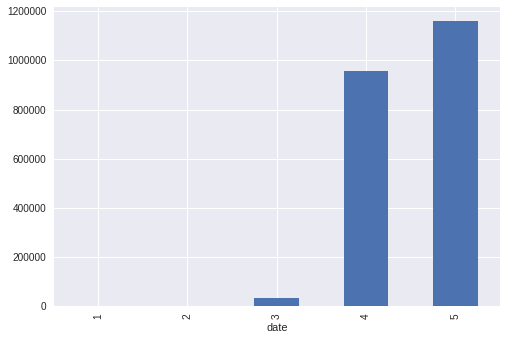

In [23]:
mes[0:5].plot.bar()